In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import files

[data set](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [2]:
print("Please upload the Mall_Customers.csv file")
uploaded = files.upload()


Please upload the Mall_Customers.csv file


Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


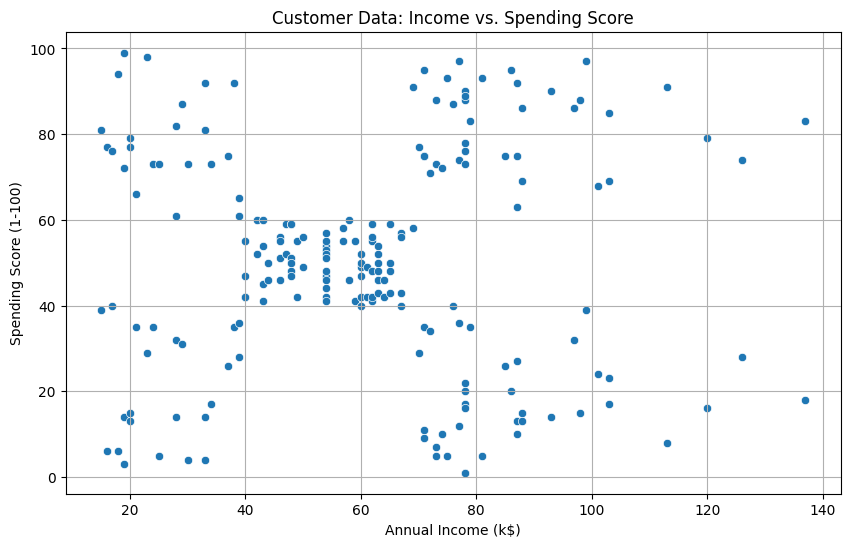

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title('Customer Data: Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

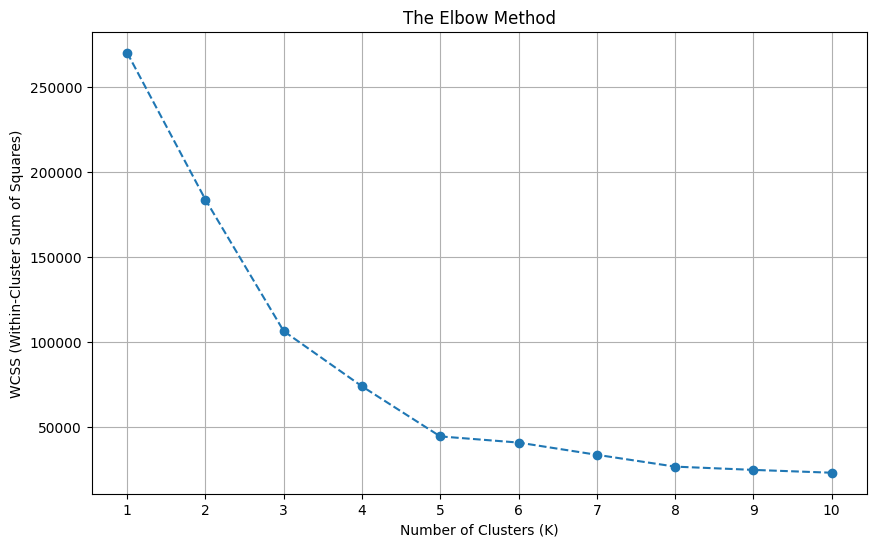

In [9]:
# Cell 4: The Elbow Method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [8]:
# Cell 5: Building the Final Model with K=5

# Initialize the KMeans model with our optimal K
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X)

# Let's see the cluster assignments for the first few customers
print("Cluster assignments for the first 10 customers:")
print(y_kmeans[:10])

Cluster assignments for the first 10 customers:
[4 2 4 2 4 2 4 2 4 2]


In [11]:
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


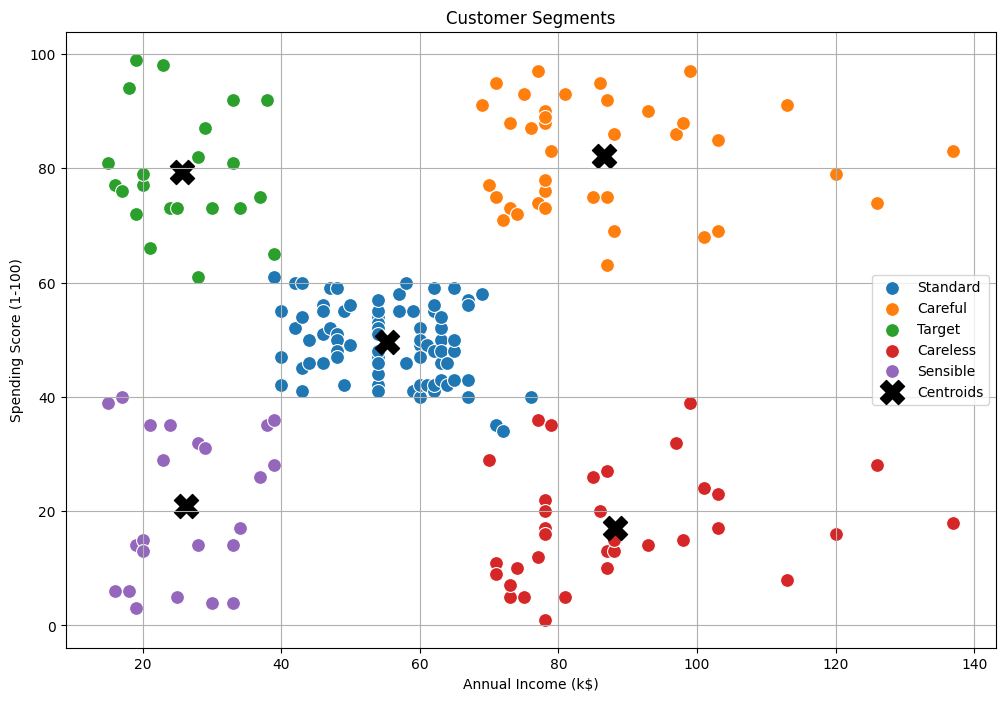

In [ ]:
# Cell 6: Visualizing the Clusters

# Add the cluster assignments back to our original DataFrame for easier interpretation
df['Cluster'] = y_kmeans

plt.figure(figsize=(12, 8))

# Create a scatter plot for each cluster
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], s=100, label='Standard')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], s=100, label='Careful')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], s=100, label='Target')
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], s=100, label='Careless')
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], s=100, label='Sensible')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df['Cluster']

KeyError: 'Cluster'

In [9]:
cluster_map = {
    0: 'Standard',
    1: 'Careful',
    2: 'Target',
    3: 'Careless',
    4: 'Sensible'
}

def predict_customer_segment(income, spending_score):
    new_customer_data = [[income, spending_score]]

    # Use our trained 'kmeans' model to predict the cluster
    predicted_cluster_index = kmeans.predict(new_customer_data)[0]

    # Get the segment name from our map
    segment_name = cluster_map[predicted_cluster_index]

    return segment_name

# --- Let's test our function! ---

# Example 1: A high-income, high-spending customer
customer_1_segment = predict_customer_segment(income=85, spending_score=90)
print(f"Customer 1 (Income: 85, Score: 90) belongs to the '{customer_1_segment}' segment.")

# Example 2: A high-income, low-spending customer
customer_2_segment = predict_customer_segment(income=90, spending_score=15)
print(f"Customer 2 (Income: 90, Score: 15) belongs to the '{customer_2_segment}' segment.")

# Example 3: An average customer
customer_3_segment = predict_customer_segment(income=50, spending_score=55)
print(f"Customer 3 (Income: 50, Score: 55) belongs to the '{customer_3_segment}' segment.")

Customer 1 (Income: 85, Score: 90) belongs to the 'Careful' segment.
Customer 2 (Income: 90, Score: 15) belongs to the 'Careless' segment.
Customer 3 (Income: 50, Score: 55) belongs to the 'Standard' segment.
